In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("training.csv")
df.head()

df1 = pd.read_csv("additional_training.csv")
df1 = df1.fillna(df1.mean())

df_all = df.append(df1, ignore_index=True)

In [3]:
X = df_all.drop(['ID', 'prediction'], 1)
y = df_all['prediction']
X.head()

,CNNs,CNNs.1,CNNs.2,CNNs.3,CNNs.4,CNNs.5,CNNs.6,CNNs.7,CNNs.8,CNNs.9,...,GIST.502,GIST.503,GIST.504,GIST.505,GIST.506,GIST.507,GIST.508,GIST.509,GIST.510,GIST.511
0,0.55441,0.11741,0.2142,0.0,0.40766,0.34758,0.92668,0.0,0.0,0.00000,...,0.040279,0.045846,0.029135,0.047027,0.026034,0.045288,0.011120,0.035586,0.040387,0.042592
1,0.00000,0.33836,0.4855,0.0,0.29616,0.00000,0.00000,0.0,0.0,0.00000,...,0.065186,0.065654,0.030045,0.079742,0.057226,0.058520,0.029015,0.053651,0.065569,0.026031
2,0.00000,0.00000,0.0000,0.0,0.00000,0.28310,0.38639,0.0,0.0,0.00000,...,0.053569,0.027829,0.027053,0.038665,0.013614,0.025232,0.026017,0.045970,0.047973,0.024236
3,0.13490,0.10963,0.0000,0.0,0.00000,0.15531,0.90697,0.0,0.0,0.05017,...,0.041815,0.028373,0.044407,0.041338,0.039601,0.032770,0.018348,0.034647,0.061217,0.024160
4,0.00000,0.25908,0.0000,0.0,0.00000,0.00000,0.00000,0.0,0.0,0.24830,...,0.025133,0.018117,0.005035,0.042081,0.024547,0.022010,0.003721,0.020762,0.020165,0.022829


In [4]:
#Using Pearson Correlation
cor = df_all.corr()
cor_target = abs(cor['prediction'])

relevant_features = cor_target[cor_target>0.2]
relevant_features

CNNs.11       0.252381
CNNs.14       0.252209
CNNs.19       0.243724
CNNs.55       0.248397
CNNs.97       0.294000
CNNs.113      0.208288
CNNs.155      0.260343
CNNs.207      0.288701
CNNs.218      0.341106
CNNs.234      0.258680
CNNs.239      0.250415
CNNs.255      0.206811
CNNs.260      0.206132
CNNs.325      0.203186
CNNs.326      0.211674
CNNs.352      0.248195
CNNs.363      0.247292
CNNs.374      0.221838
CNNs.379      0.232261
CNNs.380      0.211540
CNNs.390      0.235814
CNNs.391      0.249817
CNNs.393      0.242717
CNNs.417      0.210897
CNNs.424      0.239444
CNNs.427      0.228892
CNNs.428      0.203302
CNNs.433      0.236016
CNNs.445      0.222804
CNNs.468      0.286223
                ...   
CNNs.4090     0.257985
CNNs.4095     0.246450
GIST.68       0.201370
GIST.72       0.218594
GIST.180      0.204274
GIST.184      0.201618
GIST.196      0.225949
GIST.200      0.242685
GIST.212      0.208319
GIST.216      0.202422
GIST.256      0.201265
GIST.264      0.214281
GIST.280   

In [5]:
print(relevant_features.index)

Index(['CNNs.11', 'CNNs.14', 'CNNs.19', 'CNNs.55', 'CNNs.97', 'CNNs.113',
       'CNNs.155', 'CNNs.207', 'CNNs.218', 'CNNs.234',
       ...
       'GIST.376', 'GIST.384', 'GIST.392', 'GIST.408', 'GIST.440', 'GIST.456',
       'GIST.460', 'GIST.468', 'GIST.472', 'prediction'],
      dtype='object', length=263)


In [5]:
X = X[list(relevant_features.index)[:-1]]
X.head()

,CNNs.11,CNNs.14,CNNs.19,CNNs.55,CNNs.97,CNNs.113,CNNs.155,CNNs.207,CNNs.218,CNNs.234,...,GIST.372,GIST.376,GIST.384,GIST.392,GIST.408,GIST.440,GIST.456,GIST.460,GIST.468,GIST.472
0,0.0000,0.0000,0.0000,0.0,0.00000,0.00000,0.0000,0.0,0.0000,0.0,...,0.002983,0.023157,0.005724,0.028190,0.025647,0.012143,0.017196,0.010374,0.008202,0.016191
1,1.1795,1.5842,2.1286,0.0,0.88851,0.00000,2.7083,0.0,2.1756,0.0,...,0.014147,0.023359,0.048235,0.042423,0.024815,0.012295,0.028646,0.020531,0.029037,0.037997
2,0.0000,0.0000,0.0000,0.0,0.00000,0.00000,0.0000,0.0,0.0000,0.0,...,0.008263,0.022033,0.036356,0.045677,0.040045,0.030093,0.037229,0.049543,0.035481,0.025619
3,0.0000,0.0000,0.0000,0.0,0.00000,0.31033,0.0000,0.0,0.0000,0.0,...,0.030559,0.032366,0.032349,0.052469,0.046940,0.021632,0.031025,0.042823,0.058811,0.023019
4,0.0000,0.0000,0.0000,0.0,0.00000,0.00000,0.0000,0.0,0.0000,0.0,...,0.003609,0.003016,0.005989,0.005001,0.005522,0.008566,0.015389,0.021114,0.009319,0.009432


In [6]:
X = (X - X.mean()) / (X.max() - X.min())
X.head()

,CNNs.11,CNNs.14,CNNs.19,CNNs.55,CNNs.97,CNNs.113,CNNs.155,CNNs.207,CNNs.218,CNNs.234,...,GIST.372,GIST.376,GIST.384,GIST.392,GIST.408,GIST.440,GIST.456,GIST.460,GIST.468,GIST.472
0,-0.036181,-0.025930,-0.033354,-0.030642,-0.055238,-0.031666,-0.030754,-0.035607,-0.045579,-0.055936,...,-0.195608,0.085319,-0.150767,0.034574,0.044714,-0.102745,-0.124736,-0.154078,-0.149604,-0.062554
1,0.402882,0.297719,0.620795,-0.030642,0.235924,-0.031666,0.958941,-0.035607,0.550901,-0.055936,...,-0.041152,0.088230,0.138167,0.135241,0.037736,-0.101652,-0.057121,-0.086882,0.019578,0.071549
2,-0.036181,-0.025930,-0.033354,-0.030642,-0.055238,-0.031666,-0.030754,-0.035607,-0.045579,-0.055936,...,-0.122559,0.069119,0.057429,0.158256,0.165477,0.026403,-0.006436,0.105054,0.071903,-0.004573
3,-0.036181,-0.025930,-0.033354,-0.030642,-0.055238,0.031796,-0.030754,-0.035607,-0.045579,-0.055936,...,0.185912,0.218048,0.030194,0.206294,0.223308,-0.034473,-0.043072,0.060596,0.261342,-0.020563
4,-0.036181,-0.025930,-0.033354,-0.030642,-0.055238,-0.031666,-0.030754,-0.035607,-0.045579,-0.055936,...,-0.186954,-0.204978,-0.148970,-0.129441,-0.124079,-0.128482,-0.135406,-0.083025,-0.140535,-0.104122


In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

clf = RandomForestClassifier(n_estimators=500, criterion='entropy')
clf2 = DecisionTreeClassifier()
clf3 = SVC()
clf.fit(x_train, y_train)
clf2.fit(x_train, y_train)
clf3.fit(x_train, y_train)
score = clf.score(x_test, y_test)
score1 = clf2.score(x_test, y_test)
score2 = clf3.score(x_test, y_test)
print(score)
print(score1)
print(score2)

0.7432432432432432
0.6351351351351351
0.7335907335907336


In [19]:
df_test = pd.read_csv("testing.csv")
df_test.head() 

,ID,CNNs,CNNs.1,CNNs.2,CNNs.3,CNNs.4,CNNs.5,CNNs.6,CNNs.7,CNNs.8,...,GIST.502,GIST.503,GIST.504,GIST.505,GIST.506,GIST.507,GIST.508,GIST.509,GIST.510,GIST.511
0,1,0.0,0.0,0.0,0.00000,0.000000,0.00000,0.070439,0.00000,0.00000,...,0.016082,0.018050,0.026246,0.016743,0.027159,0.018552,0.034888,0.020146,0.021735,0.027613
1,2,0.0,0.0,0.0,0.73255,0.012443,0.31711,0.000000,0.53624,0.00000,...,0.024740,0.019518,0.023367,0.034672,0.030971,0.017942,0.023141,0.020589,0.014712,0.014601
2,3,0.0,0.0,0.0,0.19138,0.011439,0.25472,0.000000,0.61525,0.00000,...,0.075345,0.023120,0.103670,0.088414,0.074879,0.031132,0.028290,0.025993,0.034763,0.024614
3,4,0.0,0.0,0.0,0.00000,1.031900,0.00000,0.000000,0.00000,0.00000,...,0.027931,0.013575,0.014597,0.026176,0.048451,0.006365,0.025952,0.035567,0.034943,0.021042
4,5,0.0,0.0,0.0,0.31058,0.000000,0.00000,0.274150,0.00000,0.35697,...,0.015444,0.006098,0.033443,0.006657,0.031139,0.062058,0.034414,0.020785,0.026545,0.017278


In [20]:
indices = df_test["ID"]
df_test = df_test[list(relevant_features.index)[:-1]]

df_test.head()

,CNNs.11,CNNs.14,CNNs.19,CNNs.55,CNNs.97,CNNs.113,CNNs.155,CNNs.207,CNNs.218,CNNs.234,...,GIST.372,GIST.376,GIST.384,GIST.392,GIST.408,GIST.440,GIST.456,GIST.460,GIST.468,GIST.472
0,0.00000,0.00000,0.000000,0.00000,0.0000,0.33137,0.000000,0.00000,0.00000,0.00000,...,0.032994,0.027220,0.031738,0.032362,0.029219,0.051145,0.044545,0.034520,0.038425,0.039154
1,0.00000,0.00000,0.000000,0.00000,0.0000,0.00000,0.034821,0.00000,0.00000,0.00000,...,0.032548,0.029193,0.065477,0.020525,0.020381,0.028906,0.042733,0.025125,0.068422,0.045224
2,0.00000,0.00000,0.077949,0.00000,0.0000,0.00000,0.000000,0.00000,0.00000,0.00000,...,0.008239,0.076564,0.030932,0.080791,0.020590,0.017204,0.020974,0.020522,0.012130,0.021505
3,0.00000,0.96545,0.000000,0.32609,1.0381,1.60530,0.000000,0.55067,0.81888,0.28951,...,0.011800,0.013620,0.029693,0.017267,0.019307,0.017808,0.021370,0.049211,0.023282,0.015435
4,0.61807,0.00000,0.000000,0.00000,0.0000,0.00000,0.000000,0.00000,0.00000,0.49313,...,0.014819,0.021419,0.036652,0.029932,0.031010,0.067573,0.099251,0.045748,0.024927,0.054802


In [21]:
preds = [] 

for ind, data in df_test.iterrows():
    preds.append(clf.predict([data.values])[0])
    
print(preds[0:15])

[1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1]


In [23]:
to_csv = {'ID': indices, 'prediction': preds}

pre_csv = pd.DataFrame(to_csv, columns=['ID', 'prediction'])

export_csv = pre_csv.to_csv("preds1.csv", index=None, header=True)

Confusion matrix, without normalization
[[ 98 103]
 [ 30 287]]


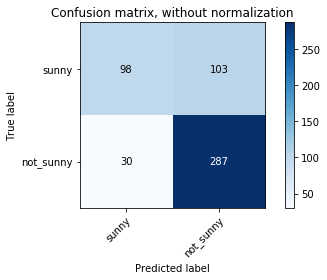

In [31]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

y_pred = clf.predict(x_test)

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=["sunny", "not_sunny"],
                      title='Confusion matrix, without normalization')

plt.show()

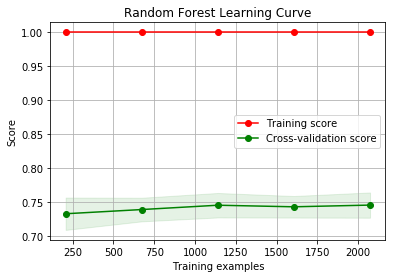

In [36]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):

    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = RandomForestClassifier(n_estimators=500)
plot_learning_curve(estimator, "Random Forest Learning Curve", X, y, cv=cv, n_jobs=4)
plt.show()